<a href="https://colab.research.google.com/github/IDF13/mulcam_army/blob/sumin/KMeans(The_Optimal_Cluster)_seventeen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# -*- coding: utf-8 -*-
"""k-means_code.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Ls1XFeatzdMivoFijtX0MuN9E7ADviAC
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

"""# 데이터 불러오기
댓글을 얼마나 불러와야 할까
"""

# 데이터 불러오기

path = '/content/drive/MyDrive/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/k-pop_Radar아티스트 크롤링 할당분/수민_결과물/'
comment_file = 'prepro_stats_page_640세븐틴.csv' 

data = pd.read_csv(path+comment_file, encoding='utf-8', header=None)
data.columns = ['comment','like','lang']
print(len(data))
data.head()

data_ko = pd.DataFrame([kor[:1] for kor in data.values if kor[2] == '(ko)'], columns=['comment'])
data_en = pd.DataFrame([en[:1] for en in data.values if en[2] == '(en)'], columns=['comment'])
data_en.comment.values

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re

for i in range(len(data_en.comment)):
    data_en.comment[i] = str(data_en.comment[i])

# 숫자제거 / 밑줄 제외한 특수문자 제거
p = re.compile("[0-7]+")
z = re.compile("[8-9]+")
q = re.compile("\W+")
r = re.compile('[^a-zA-Z]+')

en = []
for i in data_en.comment.values:
    tokens = re.sub(p," ",i)
    tokens = re.sub(z," ",tokens)
    tokens = re.sub(q," ",tokens)
    tokens = re.sub(r," ", tokens)
    en.append(tokens)
len(en)
en[:2]

# 불용어 제거
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english')) 
# stop_words.update(('song','group','songs','youtube','views','time','https','girl','girls','people','yes','lol','video','part','member','members', 'look','way','guys','fans','fan'))

res=[]
for i in range(len(en)):
    word_tokens = word_tokenize(en[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    res.append(result)

# print(word_tokens) 
print(res[:10])
print(len(res))

en_pos = []
for i in range(len(res)):
    tokens_pos = nltk.pos_tag(res[i])
    en_pos.append(tokens_pos)

en_pos[:5]

# 명사는 NN을 포함하고 있음을 알 수 있음
en_NN=[]
for i in range(len(en_pos)):
    NN_words = []
    for word, pos in en_pos[i]:
        if 'NN' in pos:
            NN_words.append(word)
        elif 'NN' in pos:
            NN_words.append(word)
    en_NN.extend(NN_words)
en_NN[:10]

# df = pd.DataFrame(en_NN)


83238
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[['even', 'carat', 'let', 'admit', 'song', 'universal'], ['song', 'tells', 'song', 'need', 'billion', 'views', 'prove', 'legendary'], ['fan', 'say', 'song', 'another', 'level'], ['years', 'passed', 'song', 'still', 'legend', 'probably', 'legacy', 'passed', 'different', 'generation', 'generation', 'attacca', 'released', 'october', 'hope', 'able', 'reach', 'new', 'milestone', 'boys', 'lately', 'previous', 'comebacks', 'struggle', 'make', 'views', 'go', 'together', 'almost', 'years', 'ripe', 'already', 'still', 'lack', 'effort', 'whilst', 'seventeen', 'work', 'hard', 'sati

['admit',
 'song',
 'universal',
 'song',
 'tells',
 'views',
 'fan',
 'level',
 'years',
 'song']

In [36]:
## 3단어 이하 짧은 단어 제거
 # remove words less than three letters
# print(res[1])
# for word in res[1]:
#     print(word)
en_sent_less3=[]
for i in range(len(res)):
    tokens = [word for word in res[i] if len(word) >= 3]
    en_sent_less3.append(tokens)
en_sent_less3[:2]

[['even', 'carat', 'let', 'admit', 'song', 'universal'],
 ['song', 'tells', 'song', 'need', 'billion', 'views', 'prove', 'legendary']]

In [37]:
en_sent =[]
for i in range(len(en_sent_less3)):
    temp=" ".join(en_sent_less3[i])
    en_sent.append(temp)
en_sent[:15]

['even carat let admit song universal',
 'song tells song need billion views prove legendary',
 'fan say song another level',
 'years passed song still legend probably legacy passed different generation generation attacca released october hope able reach new milestone boys lately previous comebacks struggle make views together almost years ripe already still lack effort whilst seventeen work hard satisfy every menu aim make taste unending gose segments contents hope able pay back',
 'fan really like songs especially one deserves attention views',
 'funfact everyone agree successful comeback seventeen',
 'proof choreography need jumps flips beautifully done goes well music probably one favorites also video choreography danced speed left awe well synchronized',
 'forget fandom carat comes song',
 'proves songs need badass become addictive',
 'seventeen stan like guys deserves views likes masterpiece',
 'today wan cry year anniversary thank seventeen give masterpiece song',
 'remember wat

In [38]:
data_en['en_sent']=en_sent

In [39]:
data_en.tail()

,comment,en_sent
69830,im updated but i want to binge watch more svt ...,updated want binge watch svt videos
69831,anyways im currently binge watching their vliv...,anyways currently binge watching vlives help
69832,novesuity dino thank you tho 🥰,novesuity dino thank tho
69833,lui quinto did you watch seventeen project big...,lui quinto watch seventeen project big debut a...
69834,막내온탑 seventeen im currently watching those,seventeen currently watching


In [40]:
# TF_IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

docs = data_en
# len(docs)
docs

,comment,en_sent
0,even if you re not a carat let s all admit it ...,even carat let admit song universal
1,this song tells that some song s don t need bi...,song tells song need billion views prove legen...
2,not a fan but i should say that this song is o...,fan say song another level
3,4 years have passed and this song is still a l...,years passed song still legend probably legacy...
4,i m not a fan of them but i really like all of...,fan really like songs especially one deserves ...
...,...,...
69830,im updated but i want to binge watch more svt ...,updated want binge watch svt videos
69831,anyways im currently binge watching their vliv...,anyways currently binge watching vlives help
69832,novesuity dino thank you tho 🥰,novesuity dino thank tho
69833,lui quinto did you watch seventeen project big...,lui quinto watch seventeen project big debut a...


In [41]:
tfidf = TfidfVectorizer(stop_words=None, 
                        #min_df = 3,  # 3회 미만으로 등장하는 토큰은 무시
                        max_df = 0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )
docs_tf = tfidf.fit_transform(docs)

# (stop_words='english')
# token_pattern='(?u)\\b\\w+\\b' or 't\w+'
# ngram_range : 단어장 생성에 필요한 토큰의 크기       
# list일 경우 : fit['']
# https://wikidocs.net/33661 -> tf-idf 매개변수

In [42]:
docs.shape

(69835, 2)

In [43]:
docs_tf.shape

(2, 2)

In [44]:
docs_tf[:,0]

<2x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [45]:
docs.tail()

,comment,en_sent
69830,im updated but i want to binge watch more svt ...,updated want binge watch svt videos
69831,anyways im currently binge watching their vliv...,anyways currently binge watching vlives help
69832,novesuity dino thank you tho 🥰,novesuity dino thank tho
69833,lui quinto did you watch seventeen project big...,lui quinto watch seventeen project big debut a...
69834,막내온탑 seventeen im currently watching those,seventeen currently watching


In [81]:
# 데이터 불균형
# df.Class.value_counts(normalize=True).plot(kind='bar')
# print(df.Class.value_counts(normalize=True)*100)

In [46]:
# # oversampling
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(with_mean=False)
# data_en['scaling'] = scaler.fit_transform(docs_tf)
# # data_en.drop(['overscaling'], axis=1)
# data_en.head()

In [47]:
# docs = data_en
# docs_tf

In [64]:
# data_en['scaling'].shape

In [49]:
type(docs)

pandas.core.frame.DataFrame

In [50]:
type(docs_tf)

scipy.sparse.csr.csr_matrix

In [51]:
docs_tf_df = pd.DataFrame(docs_tf)

In [52]:
type(docs_tf_df)

pandas.core.frame.DataFrame

In [53]:
t = docs.transpose()

In [83]:
docs.shape

(69835, 2)

In [54]:
t.shape

(2, 69835)

In [87]:
docs_tf.shape

(2, 2)

In [100]:
t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,69795,69796,69797,69798,69799,69800,69801,69802,69803,69804,69805,69806,69807,69808,69809,69810,69811,69812,69813,69814,69815,69816,69817,69818,69819,69820,69821,69822,69823,69824,69825,69826,69827,69828,69829,69830,69831,69832,69833,69834
comment,even if you re not a carat let s all admit it ...,this song tells that some song s don t need bi...,not a fan but i should say that this song is o...,4 years have passed and this song is still a l...,i m not a fan of them but i really like all of...,funfact everyone agree that this is the most s...,proof that choreography doesn t need to be all...,forget your fandom we re all a carat when it c...,this proves all songs don t need to be badass ...,not a seventeen stan like you guys but this de...,today is don t wanna cry 4th year anniversary ...,i remember watching this way back it s release...,some seventeen song recommendations for non fa...,i suppose not to cry because that s what the t...,nobody me crys cuz crush doesn t love me i don...,this song is one of the reasons i fell deep in...,what s carat,adi haris carat is seventeens fandom name,velvieluv ohhhhhhh thank you for explaining an...,agressive gamers507 oh i m army too,adi haris it s fine i m also an army and i hop...,amna shah i purple you,❤they are legendary❤,obvio❤️🤙,like ur statement,love yr comment,i luv kpop pop pp,being a kpop fan means knowing that views do n...,you are always welcome 🤗,same but a lot of seventeen songs are sooo goo...,hits different right,inhle same,it s on the next level yeh,wonwujeon yayyy,same i love this song too ❤️,get a job,dementedgoose thank you for the advice and i a...,this is soo true i totally relate with u,i was today years old when i realized it,they really got me learning korean without me ...,...,chainne quintans i only know the performance team,you should start from seventeen s debut plan a...,hello jeonghan already in high quality on my p...,drunk fox people who don t know what real musi...,drunk fox those uglies,derpy jamjam yeah they re freaks,kailany thays welcome,pinkie pye thank you♡,really really thank u nana u guys r making my ...,scoups 3,you and you scoups real name seungcheol he s t...,you and you seventeen s leader hiphop unit lea...,thank you guysss,you and you this is svt leader s coupsreal nam...,you and you you re always welcome,kim mingyu omaygadeu i cant get over him as i ...,you and you have you tried to watch mansae sco...,kim mingyu omaygadeu i just saw it lol i like ...,watch one fine day if you wanna see scoups try...,kanura a yes after clap this the new song,tiffany cano my favourite sv song after highli...,kanura a i don t knw what is happening with th...,really not like a real comeback they said that...,this is pretty much just a repackaged title tr...,welcome if you need help learning more about t...,first greet welcome and slip into diamond life...,you need to watch seventeen project,vauni 98 that would be reaaally helpful thank ...,17 carats thank u,catdoggyswaeg ok thank u,also i already watched ofd 1 2 svt club and ma...,lui quinto first i wanna say thank you and wel...,lui quinto going seventeen,lui quinto fear hit getting closer and manyyy ...,i ve watch gose from 1st season until 2020 now...,im updated but i want to binge watch more svt ...,anyways im currently binge watching their vliv...,novesuity dino thank you tho 🥰,lui quinto did you watch seventeen project big...,막내온탑 seventeen im currently watching those
en_sent,even carat let admit song universal,song tells song need billion views prove legen...,fan say song another level,years passed song still legend probably legacy...,fan really like songs especially one deserves ...,funfact everyone agree successful comeback sev...,proof choreography need jumps flips beautifull...,forget fandom carat comes song,proves songs need badass become addictive,seventeen stan like guys deserves views 

In [106]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x = np.array(t)
y = np.array(docs_tf)

In [107]:
x.shape

(2, 69835)

In [108]:
docs_tf.shape

(2, 2)

In [105]:
y.shape

()

In [112]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train,y_train = smote.fit_sample(x,y)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

TypeError: ignored

In [ ]:
from sklearn.cluster import KMeans

points = dataset[0]
kmeans = KMeans(n_clusters=4)

kmeans.fit(points)

# plt.scatter(dataset[0][:,0], dataset[0][:,1])
# plt.scatter(dataset[0][:,0], dataset[0][:,1])

In [80]:
tfidf = TfidfVectorizer(stop_words=None, 
                        #min_df = 3,  # 3회 미만으로 등장하는 토큰은 무시
                        max_df = 0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )
docs_t_tf = tfidf.fit_transform(t)

# As you see the error is AttributeError: 
# 'int' object has no attribute 'lower' which means integer cannot be lower-cased. 
# Somewhere in your code, it tries to lower case integer object which is not possible.
# https://stackoverflow.com/questions/53986123/attributeerror-int-object-has-no-attribute-lower-in-tfidf-and-countvectoriz

AttributeError: ignored

In [ ]:
# # 1) Convert all rows in your corpus to string object.

# # corpus = ['sentence1', 'sentence 2', 12930, 'sentence 100']
# corpus = [str (item) for item in t]

# # 2) Remove integers in your corpus:

# # corpus = ['sentence1', 'sentence 2', 12930, 'sentence 100']
# corpus = [item for item in corpus if not isinstance(item, int)]

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x = np.array(t)
y = np.array(docs_tf)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# print("Number transactions x_train dataset: ", x_train.shape)
# print("Number transactions y_train dataset: ", y_train.shape)
# print("Number transactions x_test dataset: ", x_test.shape)
# print("Number transactions y_test dataset: ", y_test.shape)

In [67]:
y.shape

(2, 1)

In [69]:
y.dtype

dtype('O')

In [71]:
y.size

2

# clustering

In [74]:
# 최적의 군집

inertia_arr = []
k_range = range(1,11)

for k in k_range :

  km = KMeans(n_clusters=k, random_state=200)
  km.fit(docs)
  interia = km.inertia_

  print('k :', k, 'interia :', interia)

  inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr) 

ValueError: ignored

In [ ]:
#모델링

def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)

#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))

In [ ]:
# X = np.array([[df.tran_cityname, df.tran_signupos, df.tran_signupchannel, df.tran_vmake, df.tran_vmodel, df.tran_vyear]])
# Y = np.array(df['completed_trip_status'].values.tolist())

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x = np.array(data_en.columns !='scaling')
y = np.array(data_en.columns !='scaling')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [13]:
inertia_arr = []
k_range = range(1,11)

for k in k_range :

  km = KMeans(n_clusters=k, random_state=200)
  km.fit(docs_tf)
  interia = km.inertia_

  print('k :', k, 'interia :', interia)

  inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr) 

k : 1 interia : 1.0
k : 2 interia : 0.0


ValueError: ignored

In [ ]:
# docs_tf.reshape()

In [ ]:
"""# K-Means clustering"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# # 최적의 군집 찾기

# distortions = []
# for i in range(1, 11):
#     km = KMeans(
#         n_clusters=i,init='k-means++',
#         n_init=10, max_iter=300,
#         tol=1e-04, random_state=0
#     )
#     km.fit(docs_tf)
#     distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

# # distortions

# centers = km.cluster_centers_
# print(centers)

ValueError: ignored

In [ ]:
# plt.savefig('/content/drive/MyDrive/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/k-pop_Radar아티스트 크롤링 할당분/수민_결과물/k-means++_DAY6',  dpi=200, facecolor='#eeeeee', bbox_inches='tight' )

In [ ]:
# km.inertia_

In [ ]:
# km.score()

In [ ]:
inertia_arr = []
k_range = range(1,11)

for k in k_range :

  km = KMeans(n_clusters=k, random_state=200)
  km.fit(docs)
  interia = km.inertia_

  print('k :', k, 'interia :', interia)

  inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr) 

ValueError: ignored

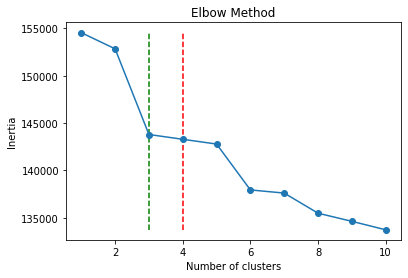

In [ ]:
plt.plot(k_range, inertia_arr, marker='o')
plt.vlines(3, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors = 'g')
plt.vlines(4, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors = 'r')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# k=3

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np

clusters = km.cluster_centers_

x = clusters.reshape(-1,1)
y = docs_tf.reshape(-1,1)

print(x.shape, y.shape)

(51810, 1) (899659926, 1)


In [ ]:
km = KMeans(n_clusters=3)
# inertia_arr = np.array(y).reshape(-1,1)

km.fit(x,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.cluster import KMeans

points = dataset[0]
kmeans = KMeans(n_clusters=4)

kmeans.fit(points)
plt.scatter(dataset[0][:,0], dataset[0][:,1])

plt.scatter(dataset[0][:,0], dataset[0][:,1])

In [ ]:
# 클러스터들의 핵심단어 추출

def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=10):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 10개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 10개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['filenames'][:5]}")
        print('-'*20)

feature_names = tfidf.get_feature_names()
cluster_details = get_cluster_details(cluster_model=km,
                                     cluster_data=data_en,
                                     feature_names=feature_names,
                                     cluster_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

In [ ]:
# Silhouette Score

from sklearn.metrics import silhouette_score

k_range = range(1,11)

best_n = -1
best_silhouette_score = -1

for k in k_range :
  km = KMeans(n_clusters=k, random_state=200)
  km.fit(docs_tf)
  clusters = km.predict(docs_tf)

  score = silhouette_score(docs_tf, clusters)
  print('k :', k, 'score :', score)

  if score > best_silhouette_score :
    best_n = k
    best_silhouette_score = score

print('best_n : ', best_n, 'best score :', best_silhouette_score)

ValueError: ignored

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np

x = clusters.reshape(-1,1)
y = docs_tf.reshape(-1,1)

print(x.shape, y.shape)

(173646, 1) (899659926, 1)


In [ ]:
km = KMeans(n_clusters=3)
# inertia_arr = np.array(y).reshape(-1,1)

km.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# check how many unique labels do you have
np.unique(km.labels_)
#array([0, 1, 2], dtype=int32)

array([0], dtype=int32)

In [ ]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# kmeans 최적 군집 시각화 : https://steadiness-193.tistory.com/285

In [ ]:
# 디버깅
# ValueError : 레이블 수는 1입니다. silhouette_score를 사용할 때 유효한 값은 2-n_samples-1 (포함)입니다.
# https://pythonq.com/so/python/553343
# https://stackoverflow.com/questions/51382250/valueerror-number-of-labels-is-1-valid-values-are-2-to-n-samples-1-inclusiv

In [ ]:
# PCA

from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
sklearn_pca_x = pca.fit_transform(docs_tf)

sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,
           scatter_kws={"s" : 50},
           hue='label')

TypeError: ignored

In [ ]:
# Silhouette Score

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(1,11)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

In [ ]:
distortions.reshape(-1,1)

AttributeError: ignored

In [ ]:
visualize_silhouette_layer(distortions)

ValueError: ignored

In [ ]:
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 10):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()